#### **Libraries Imports:**

In [ ]:
# Importação de bibliotecas [python]:
import matplotlib.pyplot as pypt
import tensorflow as pytf
import shutil as pysh
import numpy as pynp
import cv2 as pycv
import os

from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

#### **Data Augmentation [TensorFlow]:**

###### **Importação de imagens do dataset:**

In [ ]:
pysh.unpack_archive('/content/dataset.zip', '/content/', 'zip');

###### **Instância da classe ImageDataGenerator:**

In [3]:
# Construindo uma instância da classe ImageDataGenerator:
imagens_geradas = ImageDataGenerator(
                # rotation_range = 90,
                # width_shift_range = 0.2,
                # height_shift_range = 0.2,
                # shear_range = 0.2,
                # preprocessing_function = minha_funcao,

                brightness_range = [0.2, 1.2],                 # Variação do brilho entre 20% e 120%;
                channel_shift_range = 20,                      # Variação de saturação entre 0 e 20 unidades;
                zoom_range = [0.7, 1.0],                       # Variação do zoom entre 70% e 100%;
                horizontal_flip = True,                        # Flip horizontal;
                vertical_flip = True,                          # Flip vertical;
                fill_mode = 'reflect')                         # Outros: nearest, constant, reflect, wrap.

###### **Capturando um array de imagens a serem *augmentadas*:**

In [21]:
# Lendo cada imagem [formato array] manualmente e usando o método flow para modificá-las:
diretorio_do_dataset = '/content/dataset';
dataset_array = [];

dataset = os.listdir(diretorio_do_dataset);

for aux in range(len(dataset)):
    # Captura apenas arquivos com extensão .JPG e incrementa na lista dataset_array:
    if (dataset[aux].split('.')[1] == 'JPG' or dataset[aux].split('.')[1] == 'jpg' or dataset[aux].split('.')[1] == 'png' or dataset[aux].split('.')[1] == 'PNG'):
        imagem = io.imread(diretorio_do_dataset + f'//{dataset[aux]}');
        imagem = Image.fromarray(imagem, 'RGB');
        dataset_array.append(pynp.array(imagem));

# Array de imagens [formato array]:
x = pynp.array(dataset_array);

In [22]:
x.shape

(1, 460, 460, 3)

###### **Método flow para gerar as imagens *augmentadas*:**

In [8]:
os.system('mkdir augmented');

In [23]:
# Variável auxiliar:
aux = 0;

# Iterações do método flow, gerando 4 novas imagens para cada imagem normal:
for batch in imagens_geradas.flow(x, batch_size=16,  
                            save_to_dir = '/content/augmented', 
                            save_prefix = 'DJI_aug', 
                            save_format = 'jpg'):
    aux += 1;

    # Break:
    if aux == 4:
        break;

In [11]:
dataset_count = 0;
dataset_aug = len(os.listdir("/content/augmented"));

for aux in range(len(dataset)):
    # Captura apenas arquivos com extensão .JPG e incrementa dataset_count:
    if (dataset[aux].split('.')[1] == 'JPG'):
        dataset_count += 1;

print(f'- Imagens no diretório dataset: {dataset_count}');
print(f'- Imagens augmentadas: {dataset_aug}');

print(f'\n- Foram geradas {int(dataset_aug/dataset_count)} imagens augmentadas para cada imagem real.');

- Imagens no diretório dataset: 1
- Imagens augmentadas: 4

- Foram geradas 4 imagens augmentadas para cada imagem real.


###### **Remover todos os arquivos de imagens *augmentadas* geradas:**

In [26]:
# Listando o diretório:
arquivos_imagens_augmentadas = os.listdir(r'/content/augmented');

# Deletando:
for i in range(len(arquivos_imagens_augmentadas)):
    if arquivos_imagens_augmentadas[i] != '.ipynb_checkpoints':
        os.remove(f'//content//augmented//{arquivos_imagens_augmentadas[i]}');

###### **Grid para visualização das imagens *augmentadas* geradas:**

Imagens a serem plotadas: ['DJI_aug_0_7148.jpg', 'DJI_aug_0_4190.jpg', 'DJI_aug_0_1832.jpg', 'DJI_aug_0_9617.jpg'].



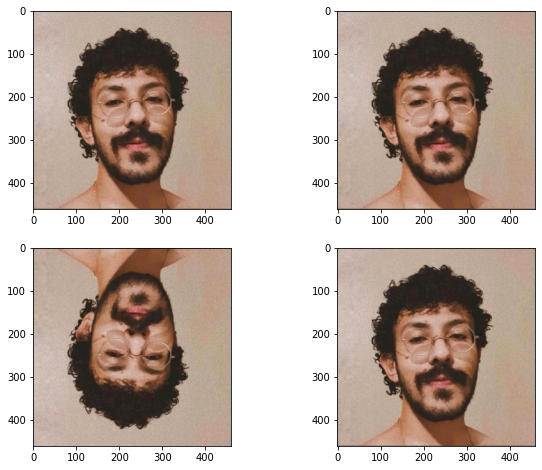

In [24]:
# Captura de imagem e tamanho:
fig = pypt.gcf();
fig.set_size_inches(10, 8);

linhas, colunas = 2, 2;

# Listando o diretório:
arquivos_imagens_augmentadas = os.listdir(r'/content/augmented');

# Deleta items que não sejam .jpg:
# arquivos_imagens_augmentadas.remove('.ipynb_checkpoints');

# Descrição do plot:
print(f'Imagens a serem plotadas: {arquivos_imagens_augmentadas[0:6]}.\n');

aux = 1;

while aux <= 4:
    # Imagem:
    imagem = pycv.imread(f'//content//augmented//{arquivos_imagens_augmentadas[aux-1]}');

    # Subplots:
    pypt.subplot(linhas, colunas, aux);
    pypt.imshow(pycv.cvtColor(imagem, pycv.COLOR_BGR2RGB));
    # fig.tight_layout(pad = 0.5);
    pypt.axis('on');
    # pypt.title("Título da Figura");
    
    aux += 1;

# Plotando:
pypt.show();

###### **Visualização das imagens *augmentadas* geradas uma a uma:**

In [ ]:
# Função para captura da imagem predictions e conversão do esquema de cores para RGB:
def captura_da_imagem(imagem):
  imagem = pycv.imread(imagem);
  fig = pypt.gcf();
  fig.set_size_inches(6, 4);

  # Plotagem com o matplotlib:
  pypt.axis('on')
  pypt.imshow(pycv.cvtColor(imagem, pycv.COLOR_BGR2RGB));
  pypt.show();

arquivos_txt = os.listdir(r'/content/augmented');

for i in range(len(arquivos_txt)):
  if arquivos_txt[i] != '.ipynb_checkpoints':
    captura_da_imagem(f'//content//augmented//{arquivos_txt[i]}');

###### **Exportação das imagens *augmentadas* geradas:**

In [ ]:
pysh.make_archive('paineis_augmented', 'zip', 'augmented')

'/content/paineis_augmented.zip'